# Выделить и посчитать клетки крови

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

from ipywidgets import interact

# Функция вывода изображения

In [2]:
def showImage(images, size = 15, colorMap = 'gray'):
    countImages = len(images)
    #size *= countImages
    pic_box = plt.figure(figsize=(size, size * countImages))
    for i, image in enumerate(images):
        pic_box.add_subplot(countImages, 2, i+1)
        plt.imshow(image)
        plt.set_cmap(colorMap)
        plt.subplots_adjust(wspace=0, hspace=0.1)
        plt.axis('off')
    plt.show()

# Перевод в полутоновое

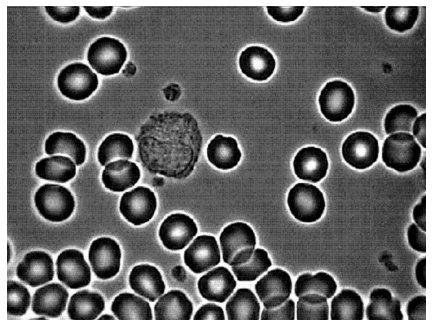

In [3]:
img = cv2.imread('2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
showImage([gray])

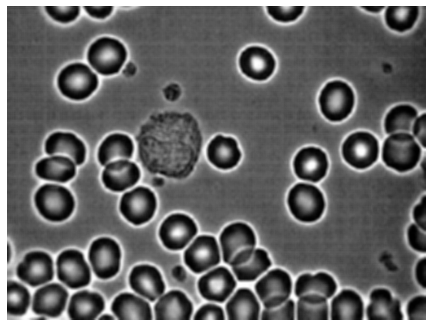

In [4]:
blur = cv2.blur(gray, (7,7))
showImage([blur])

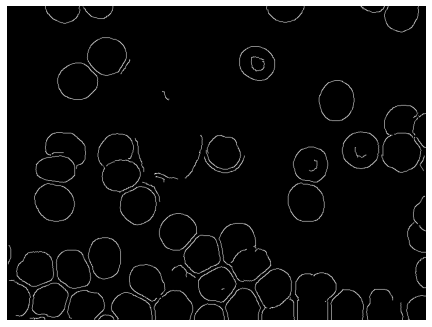

In [5]:
canny = cv2.Canny(blur, 130, 235)
showImage([canny])

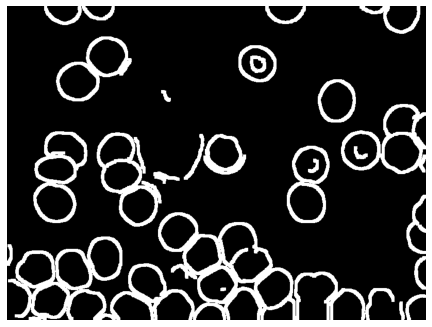

In [6]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (6,6))
dilate = cv2.dilate(canny, kernel1)
showImage([dilate])

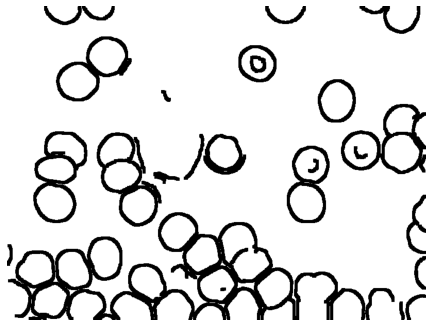

In [7]:
hpone= np.ones(dilate.shape, dtype = 'uint8')
rule = cv2.subtract(hpone, dilate)
showImage([rule])

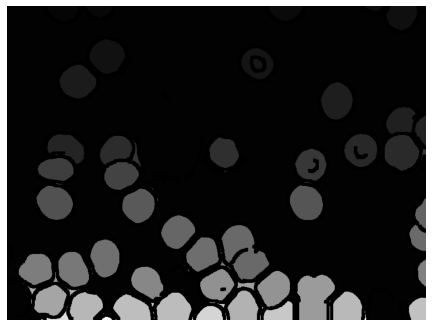

In [8]:
_, markers = cv2.connectedComponents(rule)
showImage([markers])

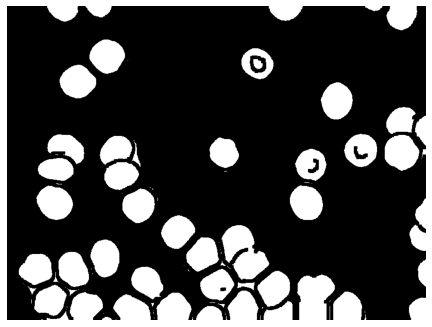

In [9]:
full = np.zeros(dilate.shape, dtype = 'uint8')
for n in np.unique(markers):
    if n != 0 and n !=1:
        full[markers == n] = 255 
trim = img
showImage([full])

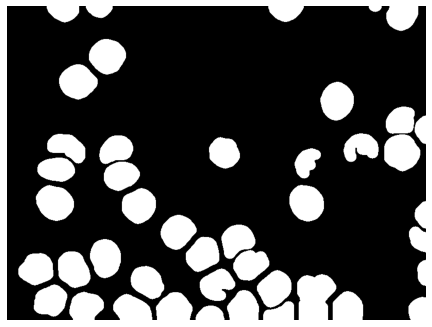

In [10]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (6, 6))
kernel4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (22, 22))
kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (21, 21))
res = cv2.dilate(full, kernel3)
res = cv2.erode(res, kernel4)
res = cv2.dilate(res, kernel5)
showImage([res])

In [11]:
count, markers2 = cv2.connectedComponents(res)
count = count-1

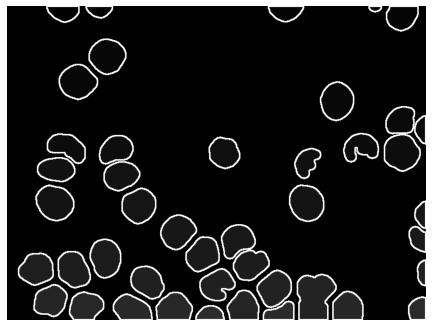

In [12]:
markers2 = np.uint8(markers2)
contours1, hierarchy = cv2.findContours( markers2, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(markers2, contours1, -1, (255,0,0), 2)
showImage([markers2])

Count of blood cells:  44


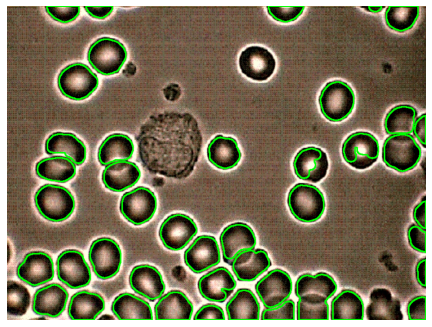

In [13]:
img[markers2==255] = [0,255,0]
print("Count of blood cells: ", count)
showImage([img])